## Cumulative transport

This notebook compare the cumulative transport across different transects among low-res, greenland mesh and CONUS mesh simulations.

Transects include:
- AR7W
- Davis Strait
- Hudson Strait
- Nares Strait
- Parry Channel
- Jones Sound

In [1]:
import os
import matplotlib.gridspec as gridspec
from mpasanalysis import *

%matplotlib inline

In [2]:
# paths
def plot_cumulative_transport(transect_name, tracer_name):
    
    # check tracer
    if 'salinity' in tracer_name:
        norm_factor = -1e-3
        norm_units = 'mSv'
    elif 'temperature' in tracer_name:
        norm_factor = -1e-6
        norm_units = 'Sv $^\circ$C'
    elif 'volume' in tracer_name:
        norm_factor = -1e-6
        norm_units = 'Sv'
    else:
        raise ValueError('Tracer \'{}\' not supported.'.format(tracer_name))
        
    # transect name
    transect_name_str = transect_name.replace(' ', '-')
    
    # load data
    fig_root = os.environ['HOME']+'/work/e3sm_res_cmp/figures'
    path_tran_hr = fig_root+'/high-res-cmp/0026-0055/data_transport_LabSea_' \
                  +transect_name_str+'_'+tracer_name+'.npz'
    path_tran_lr = fig_root+'/low-res-cmp/0026-0055/data_transport_LabSea_' \
                  +transect_name_str+'_'+tracer_name+'.npz'
    path_tran_gl = fig_root+'/gl-mesh-gm1800/0021-0050/data_transport_LabSea_' \
                  +transect_name_str+'_'+tracer_name+'.npz'
    path_tran_co = fig_root+'/conus01/0021-0030/data_transport_LabSea_' \
                  +transect_name_str+'_'+tracer_name+'.npz'

    # load data
    data_hr = np.load(path_tran_hr)
    tran_hr = data_hr['transport']*norm_factor
    dist_hr = data_hr['distance']
    print(tran_hr.shape)
    print(dist_hr.shape)
    data_lr = np.load(path_tran_lr)
    tran_lr = data_lr['transport']*norm_factor
    dist_lr = data_lr['distance']
    print(tran_lr.shape)
    print(dist_lr.shape)
    data_gl = np.load(path_tran_gl)
    tran_gl = data_gl['transport']*norm_factor
    dist_gl = data_gl['distance']
    print(tran_gl.shape)
    print(dist_gl.shape)
    data_co = np.load(path_tran_co)
    tran_co = data_co['transport']*norm_factor
    dist_co = data_co['distance']
    print(tran_co.shape)
    print(dist_co.shape)

    # mean 
    tran_hr_mean = np.mean(np.mean(tran_hr, axis=0), axis=0)
    tran_lr_mean = np.mean(np.mean(tran_lr, axis=0), axis=0)
    tran_gl_mean = np.mean(np.mean(tran_gl, axis=0), axis=0)
    tran_co_mean = np.mean(np.mean(tran_co, axis=0), axis=0)
    # std
#     tran_hr_std = np.std(tran_hr, axis=(0,1))
#     tran_lr_std = np.std(tran_lr, axis=(0,1))
#     tran_gl_std = np.std(tran_gl, axis=(0,1))
#     tran_co_std = np.std(tran_co, axis=(0,1))
    # 5th and 95th percentile
    tran_hr_pl = np.percentile(tran_hr, 5, axis=(0,1))
    tran_lr_pl = np.percentile(tran_lr, 5, axis=(0,1))
    tran_gl_pl = np.percentile(tran_gl, 5, axis=(0,1))
    tran_co_pl = np.percentile(tran_co, 5, axis=(0,1))
    tran_hr_pu = np.percentile(tran_hr, 95, axis=(0,1))
    tran_lr_pu = np.percentile(tran_lr, 95, axis=(0,1))
    tran_gl_pu = np.percentile(tran_gl, 95, axis=(0,1))
    tran_co_pu = np.percentile(tran_co, 95, axis=(0,1))

    # plot figure
    fig = plt.figure(figsize=[6,4])
    plt.axhline(y=0, linewidth=1, color='black')
    plt.plot(dist_lr, tran_lr_mean, '-', color='royalblue', label='LR ({:4.1f})'.format(tran_lr_mean[-1]))
    plt.plot(dist_gl, tran_gl_mean, '-', color='firebrick', label='GNLD ({:4.1f})'.format(tran_gl_mean[-1]))
    plt.plot(dist_co, tran_co_mean, '-', color='forestgreen', label='CONUS ({:4.1f})'.format(tran_co_mean[-1]))
    ax = plt.gca()
#     ax.fill_between(dist_lr, tran_lr_mean+tran_lr_std, tran_lr_mean-tran_lr_std, facecolor='lightblue', alpha=0.5)
#     ax.fill_between(dist_gl, tran_gl_mean+tran_gl_std, tran_gl_mean-tran_gl_std, facecolor='lightpink', alpha=0.5)
#     ax.fill_between(dist_co, tran_co_mean+tran_co_std, tran_co_mean-tran_co_std, facecolor='lightgreen', alpha=0.5)
    ax.fill_between(dist_lr, tran_lr_pl, tran_lr_pu, facecolor='lightblue', alpha=0.5)
    ax.fill_between(dist_gl, tran_gl_pl, tran_gl_pu, facecolor='lightpink', alpha=0.5)
    ax.fill_between(dist_co, tran_co_pl, tran_co_pu, facecolor='lightgreen', alpha=0.5)
    plt.xlabel('Distance (km)')
    plt.ylabel('Cumulative transport ('+norm_units+')')
    plt.legend(loc='best')
    plt.title(transect_name)

    # save figure
    figname = fig_root+'/LabSea_transport_'+transect_name_str+'_'+tracer_name+'_all.pdf'
    fig.savefig(figname, dpi = 300)

    plt.plot(dist_hr, tran_hr_mean, '-', color='black', label='HR ({:4.1f})'.format(tran_hr_mean[-1]))
#     ax.fill_between(dist_hr, tran_hr_mean+tran_hr_std, tran_hr_mean-tran_hr_std, facecolor='lightgray', alpha=0.5)
    ax.fill_between(dist_hr, tran_hr_pl, tran_hr_pu, facecolor='lightgray', alpha=0.5)
    plt.legend(loc='upper left')
    figname = fig_root+'/LabSea_transport_'+transect_name_str+'_'+tracer_name+'_all_wHR.pdf'
    fig.savefig(figname, dpi = 300)

### Transport across AR7W

(30, 12, 302)
(302,)
(30, 12, 38)
(38,)
(30, 12, 132)
(132,)
(10, 12, 256)
(256,)


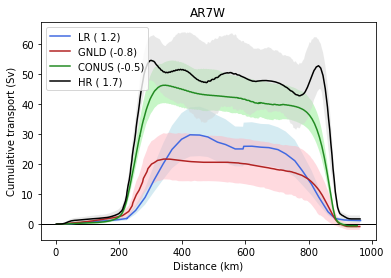

In [3]:
plot_cumulative_transport('AR7W', 'volume')


(30, 12, 302)
(302,)
(30, 12, 38)
(38,)
(30, 12, 132)
(132,)
(10, 12, 256)
(256,)


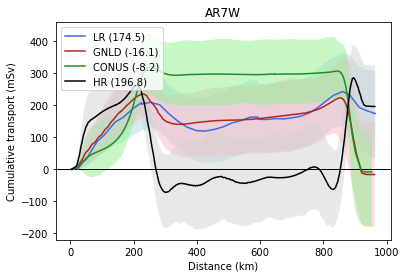

In [4]:
plot_cumulative_transport('AR7W', 'activeTracers_salinity')


(30, 12, 302)
(302,)
(30, 12, 38)
(38,)
(30, 12, 132)
(132,)
(10, 12, 256)
(256,)


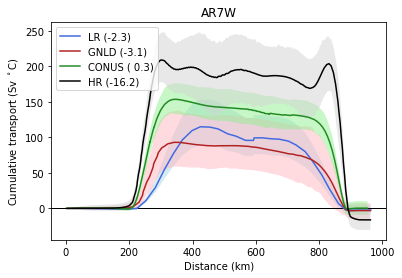

In [5]:
plot_cumulative_transport('AR7W', 'activeTracers_temperature')


### Transport across Davis Strait

(30, 12, 122)
(122,)
(30, 12, 18)
(18,)
(30, 12, 58)
(58,)
(10, 12, 84)
(84,)


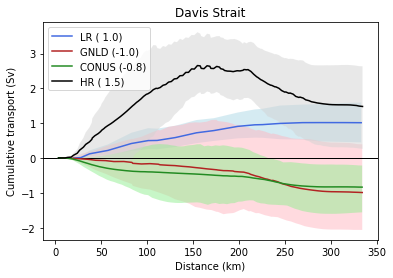

In [6]:
plot_cumulative_transport('Davis Strait', 'volume')


(30, 12, 122)
(122,)
(30, 12, 18)
(18,)
(30, 12, 58)
(58,)
(10, 12, 84)
(84,)


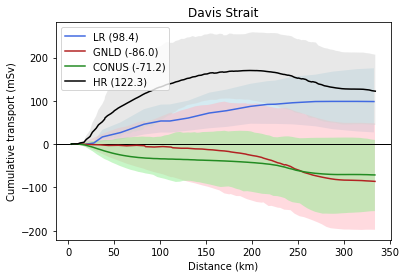

In [7]:
plot_cumulative_transport('Davis Strait', 'activeTracers_salinity')


(30, 12, 122)
(122,)
(30, 12, 18)
(18,)
(30, 12, 58)
(58,)
(10, 12, 84)
(84,)


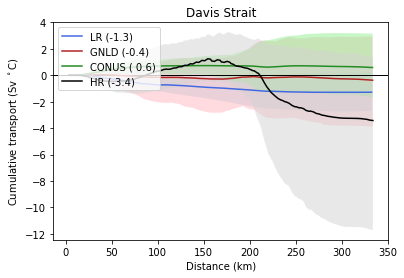

In [8]:
plot_cumulative_transport('Davis Strait', 'activeTracers_temperature')


### Transport across Hudson Strait

(30, 12, 54)
(54,)
(30, 12, 9)
(9,)
(30, 12, 20)
(20,)
(10, 12, 54)
(54,)


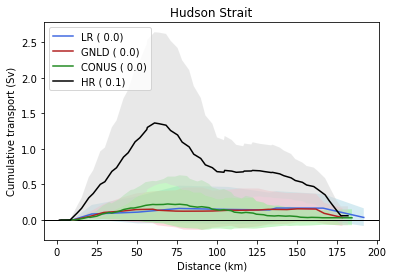

In [9]:
plot_cumulative_transport('Hudson Strait', 'volume')


(30, 12, 54)
(54,)
(30, 12, 9)
(9,)
(30, 12, 20)
(20,)
(10, 12, 54)
(54,)


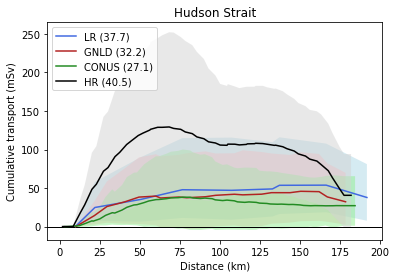

In [10]:
plot_cumulative_transport('Hudson Strait', 'activeTracers_salinity')


(30, 12, 54)
(54,)
(30, 12, 9)
(9,)
(30, 12, 20)
(20,)
(10, 12, 54)
(54,)


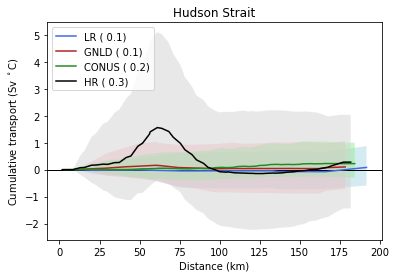

In [11]:
plot_cumulative_transport('Hudson Strait', 'activeTracers_temperature')


## Transport across Nares Strait

(30, 12, 27)
(27,)
(30, 12, 8)
(8,)
(30, 12, 10)
(10,)
(10, 12, 20)
(20,)


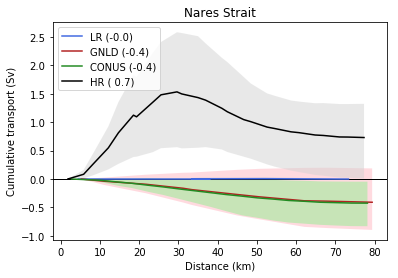

In [12]:
plot_cumulative_transport('Nares Strait', 'volume')


(30, 12, 27)
(27,)
(30, 12, 8)
(8,)
(30, 12, 10)
(10,)
(10, 12, 20)
(20,)


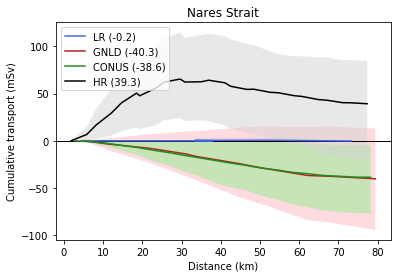

In [13]:
plot_cumulative_transport('Nares Strait', 'activeTracers_salinity')


(30, 12, 27)
(27,)
(30, 12, 8)
(8,)
(30, 12, 10)
(10,)
(10, 12, 20)
(20,)


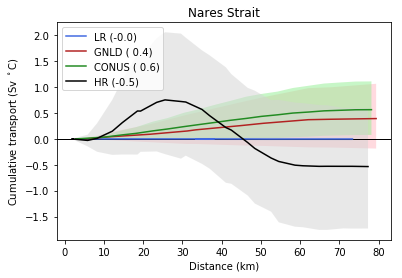

In [14]:
plot_cumulative_transport('Nares Strait', 'activeTracers_temperature')


## Transport across Parry Channel

(30, 12, 39)
(39,)
(30, 12, 6)
(6,)
(30, 12, 12)
(12,)
(10, 12, 30)
(30,)


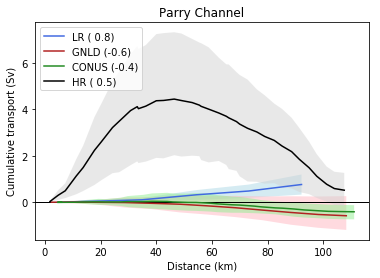

In [15]:
plot_cumulative_transport('Parry Channel', 'volume')


(30, 12, 39)
(39,)
(30, 12, 6)
(6,)
(30, 12, 12)
(12,)
(10, 12, 30)
(30,)


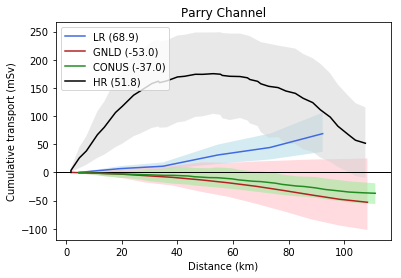

In [16]:
plot_cumulative_transport('Parry Channel', 'activeTracers_salinity')


(30, 12, 39)
(39,)
(30, 12, 6)
(6,)
(30, 12, 12)
(12,)
(10, 12, 30)
(30,)


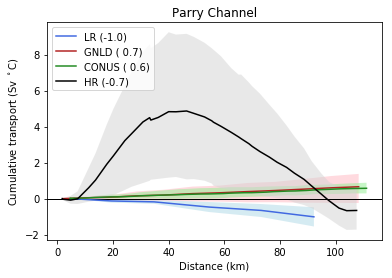

In [17]:
plot_cumulative_transport('Parry Channel', 'activeTracers_temperature')


## Transport across Jones Sound

(30, 12, 22)
(22,)
(30, 12, 5)
(5,)
(30, 12, 8)
(8,)
(10, 12, 16)
(16,)


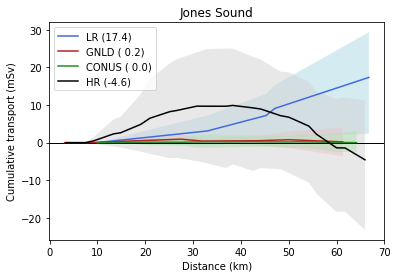

In [18]:
plot_cumulative_transport('Jones Sound', 'activeTracers_salinity')


(30, 12, 22)
(22,)
(30, 12, 5)
(5,)
(30, 12, 8)
(8,)
(10, 12, 16)
(16,)


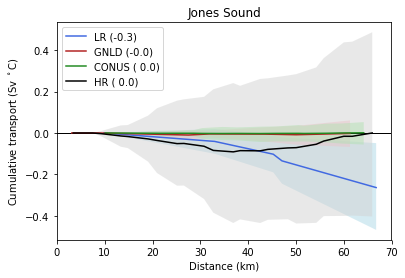

In [19]:
plot_cumulative_transport('Jones Sound', 'activeTracers_temperature')
